In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data/loan.csv


In [2]:
# Load libraries
import pandas as pd
import numpy as np
#from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#from sklearn.model_selection import train_test_split # Import train_test_split function
#from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#from sklearn.preprocessing import LabelEncoder

#from six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
# import pydotplus

In [3]:
df = pd.read_csv("/kaggle/input/loan-data/loan.csv")

In [4]:
df_encoded = df.copy()

In [5]:
print(df_encoded.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Checking the data distribution for a column
print(df_encoded['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


In [7]:
# Updating Gender Null Values 
df_encoded['Gender'].fillna('Male', inplace=True)

# Updating Married Null Values
df_encoded['Married'].fillna('Yes', inplace=True)

# Updating Dependents Null Values 
df_encoded['Dependents'].fillna(0, inplace=True)

# Updating Self_Employed Null Values 
df_encoded['Self_Employed'].fillna('No', inplace=True)

# Updating LoanAmount Null Values 
df_encoded['LoanAmount'].fillna(df_encoded['LoanAmount'].mean(), inplace=True)

# Updating Loan_Amount_Term Null Values 
df_encoded['Loan_Amount_Term'].fillna(df_encoded['Loan_Amount_Term'].mean(), inplace=True)

# Updating Credit_History Null Values 
df_encoded['Credit_History'].fillna(1, inplace=True)

# Changing tye type of Dependents atibute to string
df_encoded['Dependents'] = df_encoded['Dependents'].astype(str)

In [8]:
print(df_encoded['Dependents'].value_counts())


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [9]:
print(df_encoded['Gender'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


In [10]:
print(df_encoded.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:
print(df_encoded.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder # import for hot encoding

In [13]:
le = LabelEncoder()

In [14]:
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'].values) # ecnoding values for Gender variable
df_encoded['Married'] = le.fit_transform(df_encoded['Married'].values) # ecnoding values for Married variable
df_encoded['Dependents'] = le.fit_transform(df_encoded['Dependents'].values) # ecnoding values for Dependents variable
df_encoded['Self_Employed'] = le.fit_transform(df_encoded['Self_Employed'].values) # ecnoding values for Self_Employed variable
df_encoded['Education'] = le.fit_transform(df_encoded['Education'].values) # ecnoding values for Education variable
df_encoded['Property_Area'] = le.fit_transform(df_encoded['Property_Area'].values) # ecnoding values for Property_Area variable


In [15]:
feature_cols = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']


In [16]:
X = df_encoded[feature_cols] # Input Variable 
y = df_encoded['Loan_Status'] # Target Variable

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

In [18]:
# # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#create dummies

In [19]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

In [20]:
np.random.seed(45)
clf = DecisionTreeClassifier(criterion="entropy") # Create Decision Tree Classifier object

In [21]:
clf = clf.fit(X_train, y_train)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6972972972972973


In [25]:
np.random.seed(45)
clf = DecisionTreeClassifier(criterion="gini") # Create Decision Tree Classifier object

In [26]:
clf = clf.fit(X_train, y_train)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7243243243243244


In [29]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(clf)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7135135135135136

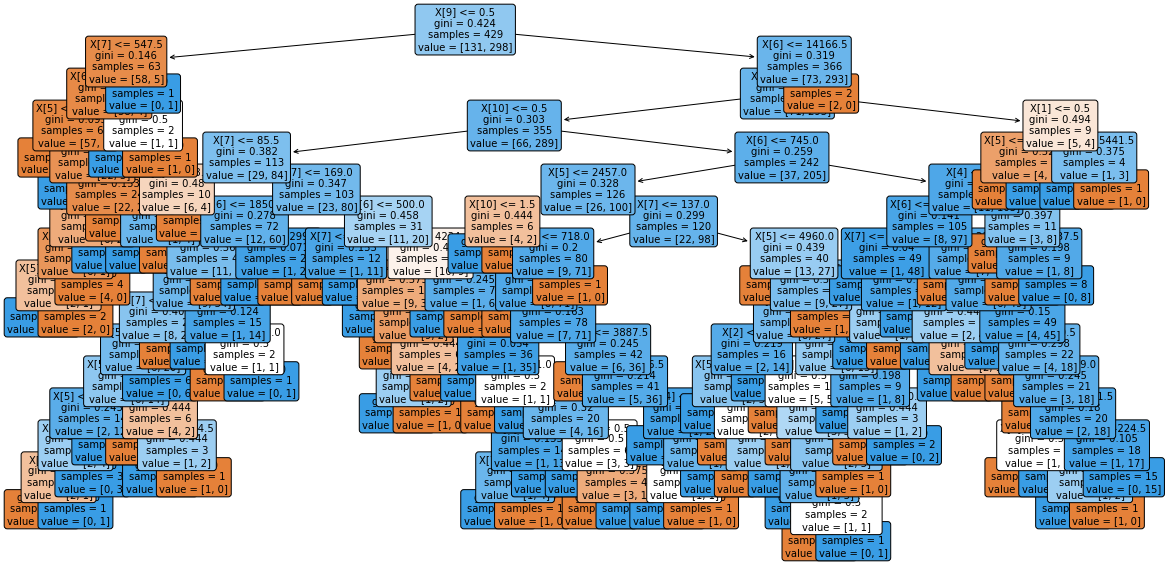

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf, fontsize=10, filled=True, rounded=True)
plt.show()

In [31]:
from sklearn.tree import export_graphviz
# import pydotplus

In [32]:
pip install pydotplus

     |████████████████████████████████| 278 kB 901 kB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=2a5e1fefdef3e7ddf1c74994abf6025e265ff8e2aac98d0f889b324590a0faa5
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pydotplus as pypi

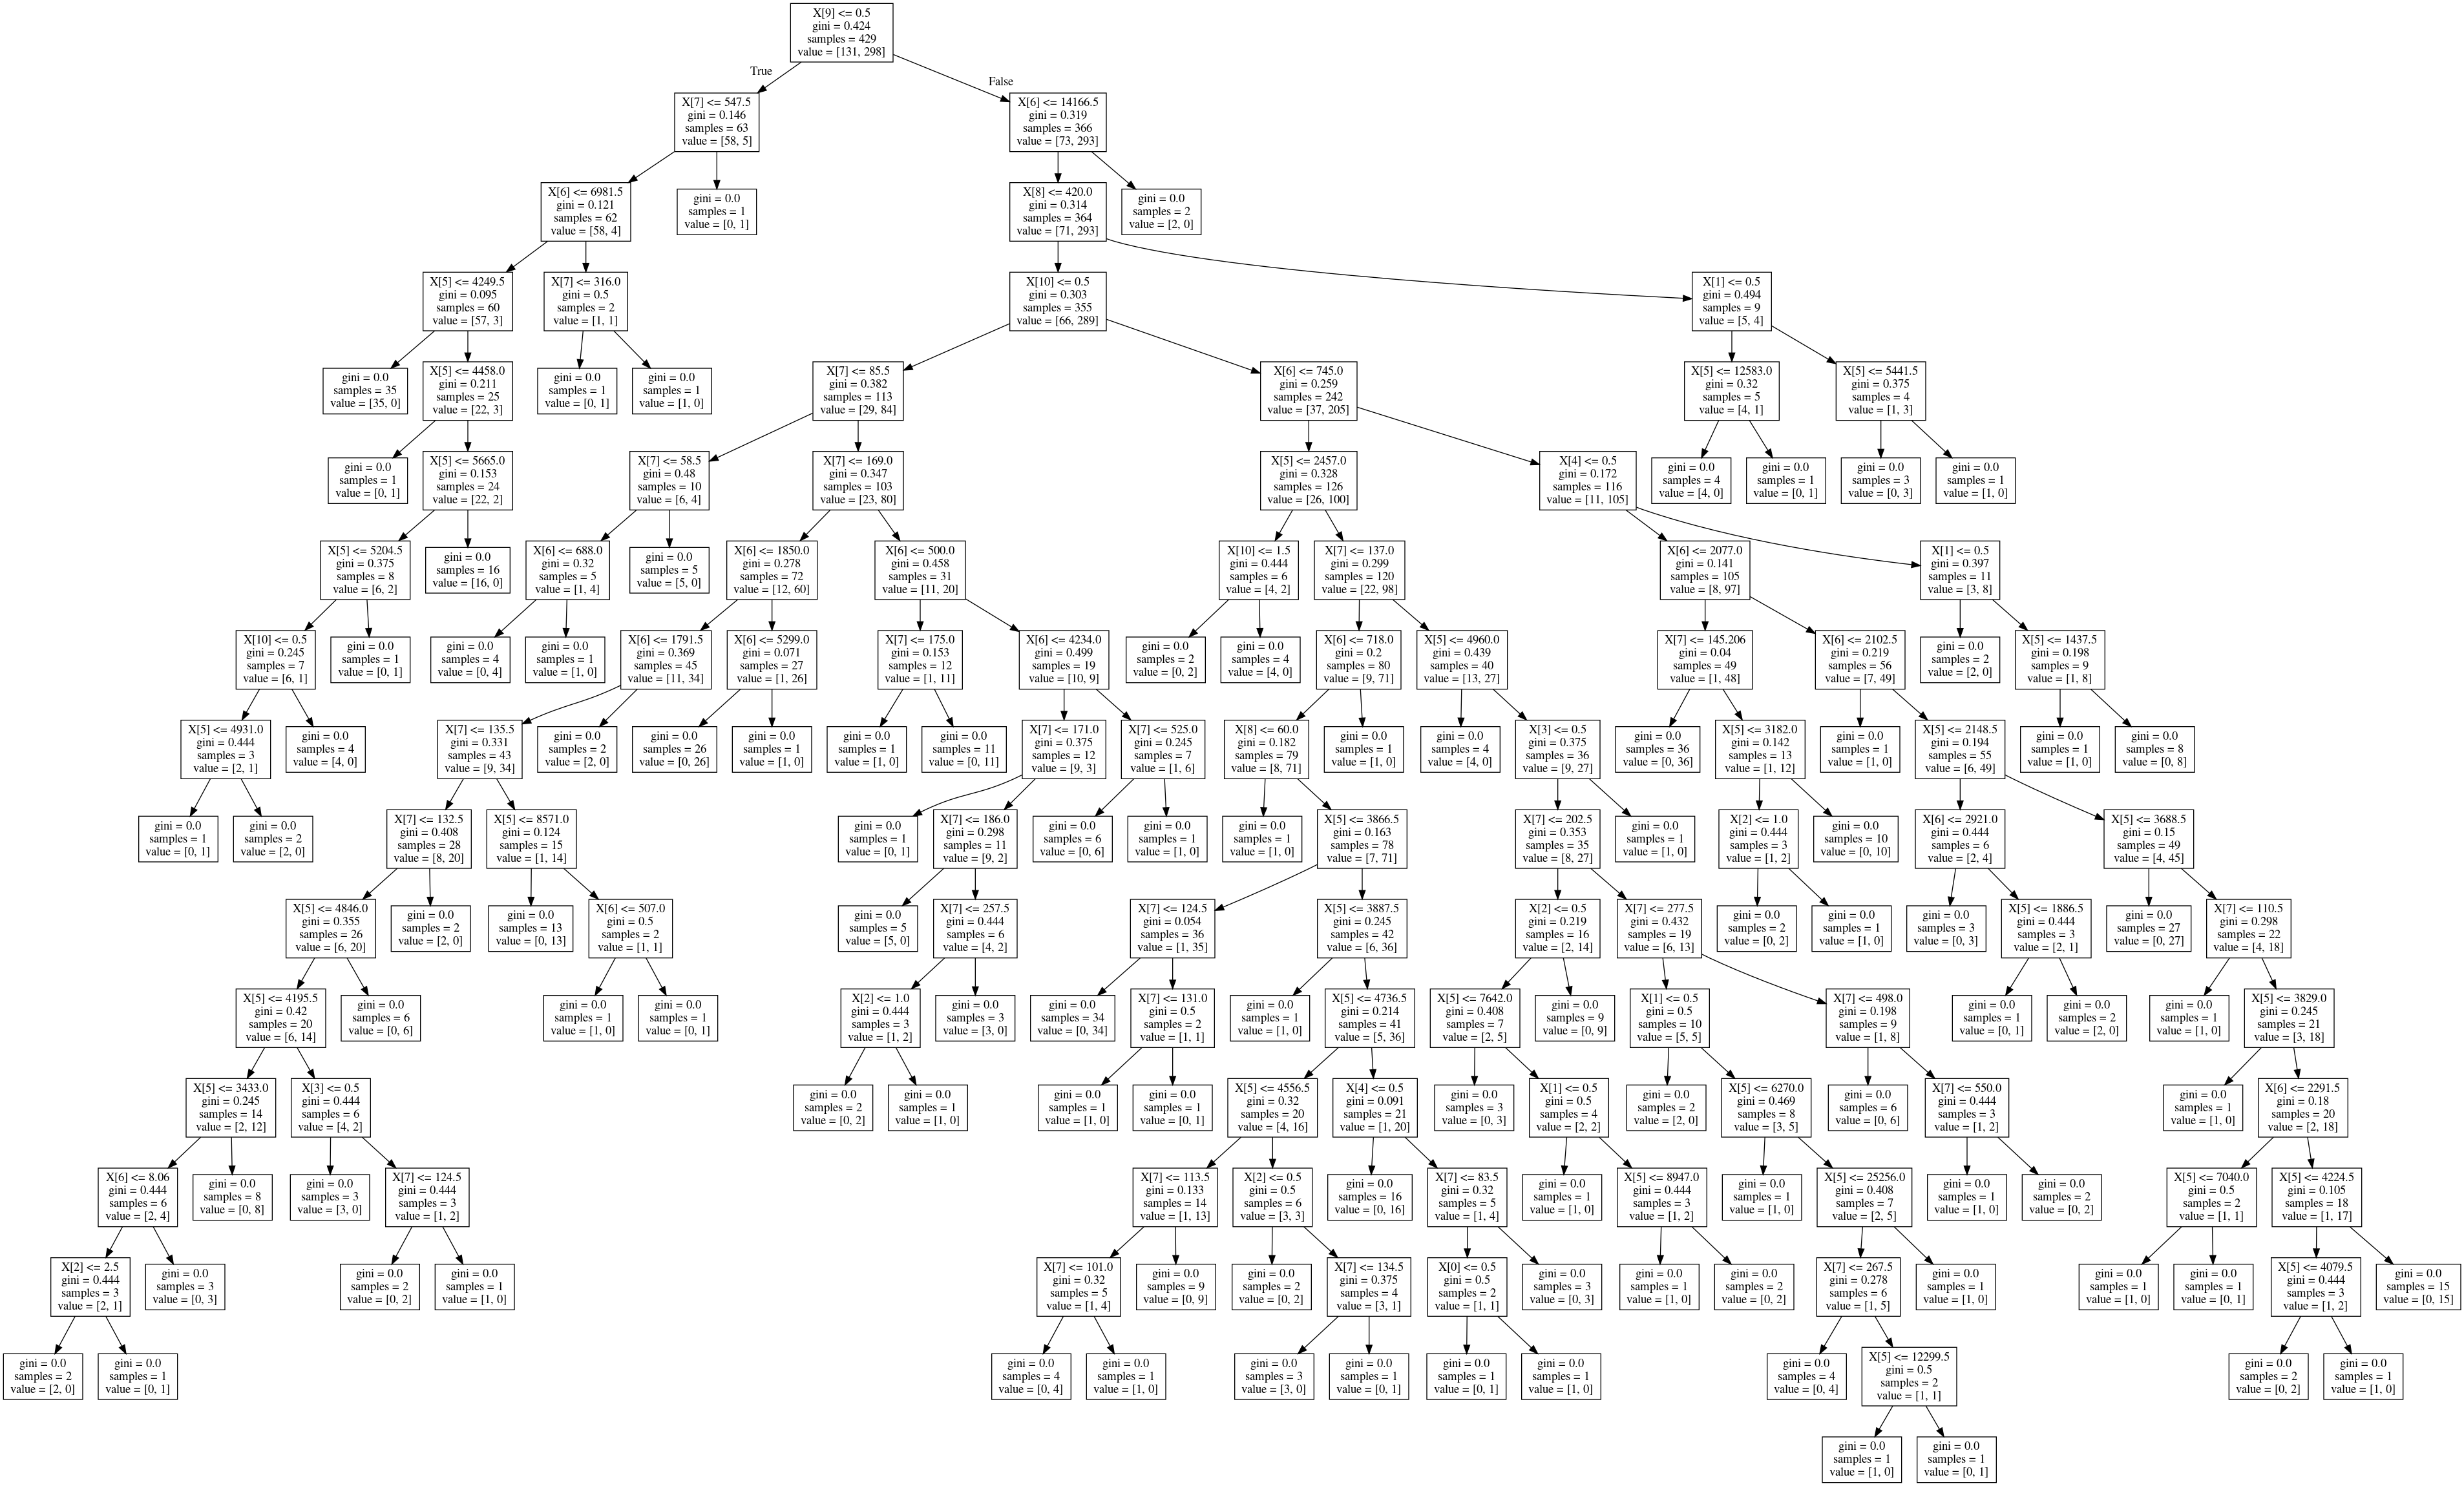

In [34]:
# Visualize Decision Tree using Graphviz
# Graphviz- Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.
from IPython.display import Image    # for graph visualisation
data_viz = export_graphviz(clf)   # Exporting graphviz representation of decision tree
# Export a decision tree in Dot format
# Draw Graph
graph_viz = pypi.graphviz.graph_from_dot_data(data_viz)   # Graph_from_dot_data is one of the method of graphviz
# Show graph
Image(graph_viz.create_png())
